In [1]:
import geopandas as gpd
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [2]:
# this code reads a csv data file containing neibourhood crime data as rated by TO police 
df = pd.read_csv("C:/Users/annam/OneDrive - University of Toronto/Notebooks/Backup/3252-011_BigData/Project/Data2/Neighbourhoods/ToLoad/Neighbourhood_Crime_Rates_Boundary_File_.csv")

In [3]:
df.head()

,OBJECTID,AREA_S_CD,Neighbourhood,Assault_2014,AutoTheft_2014,BreakandEnter_2014,Robbery_2014,TheftOver_2014,Homicide_2014,Total_2014,...,Population,Assault_Rate,AutoTheft_Rate,BreakandEnter_Rate,Robbery_Rate,TheftOver_Rate,Homicide_Rate,Total_Rate,Shape__Area,Shape__Length
0,1,97,Yonge-St.Clair (97),16,3,32,2,2,0,55,...,3189,721.229225,94.073377,533.082471,62.715585,94.073377,0.000000,1505.174036,1.161309e+06,5873.097806
1,2,27,York University Heights (27),269,118,98,60,28,1,574,...,36764,859.536503,282.885431,288.325536,195.843760,97.921880,2.720052,1729.953215,1.324698e+07,18504.936210
2,3,38,Lansing-Westgate (38),38,16,41,10,5,0,110,...,10242,517.477055,205.038079,371.021285,78.109744,48.818590,0.000000,1220.464753,5.346378e+06,11112.316458
3,4,31,Yorkdale-Glen Park (31),106,63,51,23,24,1,268,...,18233,795.261339,285.197170,318.104536,142.598585,120.660341,5.484561,1661.821971,6.038420e+06,10079.442748
4,5,16,Stonegate-Queensway (16),93,35,68,14,8,0,218,...,22207,378.259107,130.589454,238.663484,72.049354,31.521592,0.000000,851.082992,7.946086e+06,11853.054621


In [4]:
# reindex the df
df.set_index("AREA_S_CD",inplace=True)
df.head()

,OBJECTID,Neighbourhood,Assault_2014,AutoTheft_2014,BreakandEnter_2014,Robbery_2014,TheftOver_2014,Homicide_2014,Total_2014,Assault_2015,...,Population,Assault_Rate,AutoTheft_Rate,BreakandEnter_Rate,Robbery_Rate,TheftOver_Rate,Homicide_Rate,Total_Rate,Shape__Area,Shape__Length
AREA_S_CD,,,,,,,,,,,,,,,,,,,,,
97,1,Yonge-St.Clair (97),16,3,32,2,2,0,55,28,...,3189,721.229225,94.073377,533.082471,62.715585,94.073377,0.000000,1505.174036,1.161309e+06,5873.097806
27,2,York University Heights (27),269,118,98,60,28,1,574,303,...,36764,859.536503,282.885431,288.325536,195.843760,97.921880,2.720052,1729.953215,1.324698e+07,18504.936210
38,3,Lansing-Westgate (38),38,16,41,10,5,0,110,57,...,10242,517.477055,205.038079,371.021285,78.109744,48.818590,0.000000,1220.464753,5.346378e+06,11112.316458
31,4,Yorkdale-Glen Park (31),106,63,51,23,24,1,268,136,...,18233,795.261339,285.197170,318.104536,142.598585,120.660341,5.484561,1661.821971,6.038420e+06,10079.442748
16,5,Stonegate-Queensway (16),93,35,68,14,8,0,218,70,...,22207,378.259107,130.589454,238.663484,72.049354,31.521592,0.000000,851.082992,7.946086e+06,11853.054621


In [5]:
#this code reads a shapefile for the City of Toronto neibourhoods
shpfile = "C:/Users/annam/OneDrive - University of Toronto/Notebooks/Backup/3252-011_BigData/Project/Data2/toneighshape/Neighbourhoods v2_region.dbf"

In [6]:
df1 = gpd.read_file(shpfile)
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
ID          140 non-null int64
NAME        140 non-null object
geometry    140 non-null object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


In [7]:
#to reindex the df
df1.set_index("ID",inplace=True)
df1.head()

,NAME,geometry
ID,,
1,West Humber-Clairville,"POLYGON ((613738.1274955755 4842418.500238166,..."
2,Mount Olive-Silverstone-Jamestown,"POLYGON ((614299.6866614901 4843722.504681364,..."
3,Thistletown-Beaumond Heights,"POLYGON ((615789.5583775076 4842674.496142175,..."
4,Rexdale-Kipling,"POLYGON ((615990.8126066311 4842102.497014655,..."
5,Elms-Old Rexdale,"POLYGON ((616526.1326937507 4840628.498493899,..."


In [8]:
# this code merges the crime data df and the neibourhood shapefile df
df2map = pd.merge(df1, df, how='inner', left_index=True, right_index=True, sort=True)
df2map.tail()

,NAME,geometry,OBJECTID,Neighbourhood,Assault_2014,AutoTheft_2014,BreakandEnter_2014,Robbery_2014,TheftOver_2014,Homicide_2014,...,Population,Assault_Rate,AutoTheft_Rate,BreakandEnter_Rate,Robbery_Rate,TheftOver_Rate,Homicide_Rate,Total_Rate,Shape__Area,Shape__Length
136,West Hill,"POLYGON ((646719.6929937212 4846498.498069973,...",41,West Hill (136),343,23,89,65,7,0,...,36371,1075.032306,60.487751,214.456573,186.962140,21.995546,2.749443,1556.184873,9.625668e+06,14976.832720
137,Woburn,"POLYGON ((644670.1916983505 4846104.501327728,...",112,Woburn (137),351,46,121,83,11,3,...,34912,1085.586618,114.573786,312.213566,254.926673,45.829514,5.728689,1815.994500,1.233453e+07,18111.547989
138,Eglinton East,"POLYGON ((641949.4993852173 4843873.502773074,...",78,Eglinton East (138),216,21,43,81,8,0,...,6306,3441.167142,412.305741,1062.480178,903.901047,79.289565,0.000000,5899.143673,3.223329e+06,10013.050093
139,Scarborough Village,"POLYGON ((643919.3763735973 4843051.996370395,...",15,Scarborough Village (139),159,20,48,31,3,1,...,14566,1098.448442,109.844844,281.477413,192.228477,20.595908,13.730606,1716.325690,3.151143e+06,7922.855776
140,Guildwood,"POLYGON ((645221.8060719877 4844431.504858391,...",37,Guildwood (140),55,3,15,16,1,0,...,14842,330.144185,20.212909,114.539819,67.376364,13.475273,0.000000,539.010915,3.804484e+06,9830.330325


In [9]:
#to identify 10 neighbourhoods with the lowest crime rate
safe_hood_list = df2map.nsmallest(10,['Total_Rate'])
safe_hood_list.head()

,NAME,geometry,OBJECTID,Neighbourhood,Assault_2014,AutoTheft_2014,BreakandEnter_2014,Robbery_2014,TheftOver_2014,Homicide_2014,...,Population,Assault_Rate,AutoTheft_Rate,BreakandEnter_Rate,Robbery_Rate,TheftOver_Rate,Homicide_Rate,Total_Rate,Shape__Area,Shape__Length
99,Mount Pleasant East,"POLYGON ((630920.3124447259 4840181.502951141,...",101,Mount Pleasant East (99),40,7,27,2,2,0,...,33503,113.422679,26.863266,65.665761,14.924037,8.954422,0.0,226.845357,3.088929e+06,11249.859222
12,Markland Woods,"POLYGON ((614405.3109104799 4831306.998274603,...",126,Markland Wood (12),19,8,44,5,3,0,...,17465,103.063269,62.983109,125.966218,34.354423,11.451474,0.0,337.818494,2.953849e+06,7846.645771
100,Yonge-Eglinton,"POLYGON ((629225.937537597 4839151.000712592, ...",129,Yonge-Eglinton (100),24,3,28,10,2,0,...,15763,183.975132,25.375880,133.223371,50.751760,12.687940,0.0,412.358054,1.650451e+06,5686.690985
46,Pleasant View,"POLYGON ((634526.7509582636 4849211.004874303,...",137,Pleasant View (46),33,12,18,5,2,1,...,19042,215.313517,57.767041,99.779435,47.263943,15.754648,0.0,435.878584,2.967512e+06,7944.811710
109,Caledonia - Fairbanks,"POLYGON ((624650.0714372273 4837611.88595193, ...",58,Caledonia-Fairbank (109),33,8,23,8,3,0,...,15517,264.226332,45.111813,77.334536,38.667268,12.889089,0.0,438.229039,1.544450e+06,4951.237182


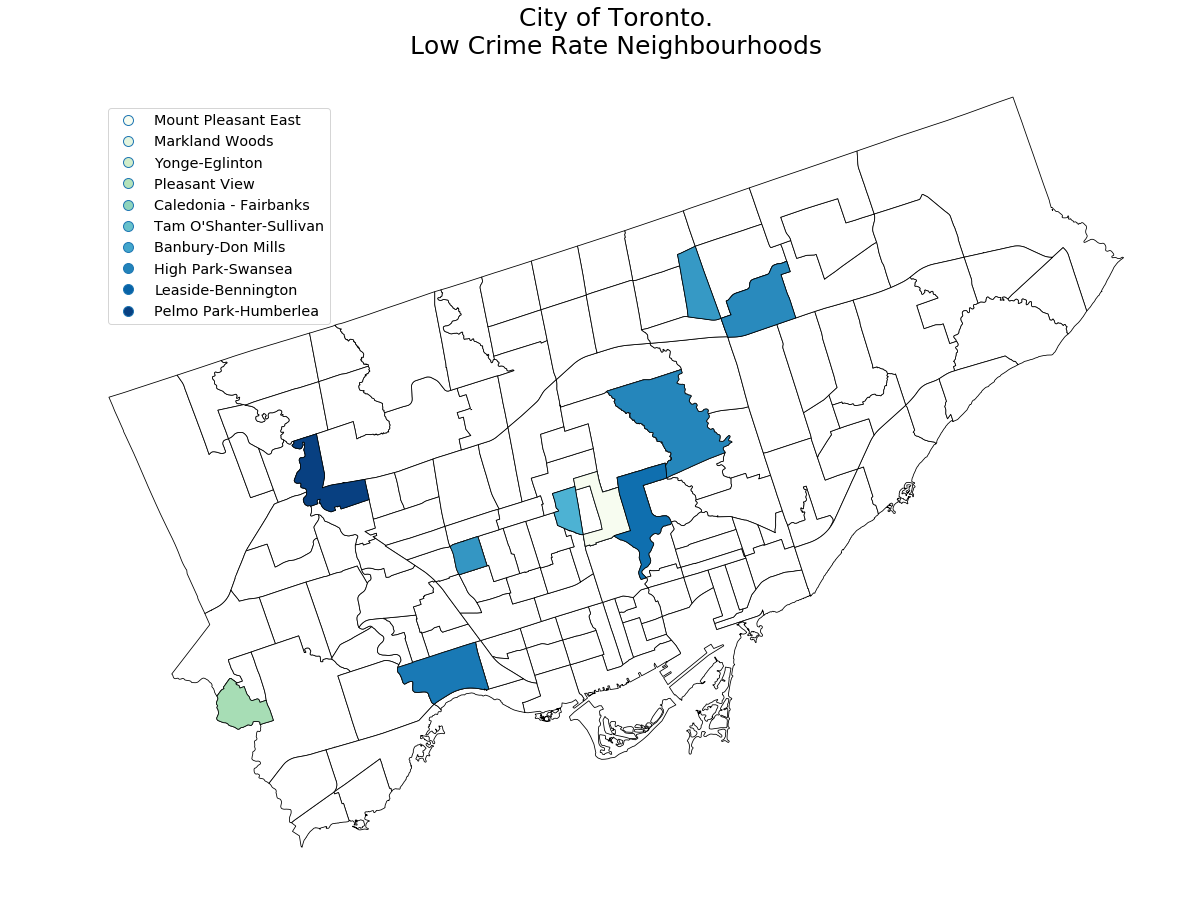

In [10]:
#this code plots the low crime neighbourhoods geometry and crime rates

plt.rc('legend',fontsize='x-large')

fig, ax = plt.subplots(1, figsize=(20, 20))

# set variables that will call the df columns to visualize on the map
variable = safe_hood_list['NAME']
variable2 = safe_hood_list['Total_Rate']

# set the range for the choropleth
vmin, vmax = 120, 220

# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, 
#but not when working with pyplot directly.

ax.set_aspect('equal')

#plot the city neighbourhoods map

plot1 = df1.plot(ax=ax, color = "white", linewidth=0.8, edgecolor='k')

#highlight low crime rate neighbourhoods

plot2 = safe_hood_list.plot(ax=ax, column = variable, cmap = "GnBu", legend = True)

plot3 = safe_hood_list.plot(ax=ax, column = variable2, cmap = "GnBu", linewidth=0.8, edgecolor = 'k')

# remove the axis
ax.set_axis_off()

# add a title
ax.set_title("City of Toronto.\nLow Crime Rate Neighbourhoods", fontdict={'fontsize': '25', 'fontweight' : '3'});

#edit the legend text
new_labels=['Mount Pleasant East',
            'Markland Woods',
            'Yonge-Eglinton',
            'Pleasant View',
            'Caledonia - Fairbanks',
            "Tam O'Shanter-Sullivan",
            'Banbury-Don Mills',
            'High Park-Swansea',
            'Leaside-Bennington',
            'Pelmo Park-Humberlea']

leg = ax.get_legend()

for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)

leg.set_bbox_to_anchor((0.25,0.95))

# show the map
plt.show();

# save the map

fig.savefig("map1_export.png", dpi=300)

In [11]:
#to identify 10 neibourhoods with the highest crime rate
unsafe_hood_list = df2map.nlargest(10, ['Total_Rate'])
unsafe_hood_list.head()

,NAME,geometry,OBJECTID,Neighbourhood,Assault_2014,AutoTheft_2014,BreakandEnter_2014,Robbery_2014,TheftOver_2014,Homicide_2014,...,Population,Assault_Rate,AutoTheft_Rate,BreakandEnter_Rate,Robbery_Rate,TheftOver_Rate,Homicide_Rate,Total_Rate,Shape__Area,Shape__Length
138,Eglinton East,"POLYGON ((641949.4993852173 4843873.502773074,...",78,Eglinton East (138),216,21,43,81,8,0,...,6306,3441.167142,412.305741,1062.480178,903.901047,79.289565,0.000000,5899.143673,3.223329e+06,10013.050093
76,Bay Street Corridor,"POLYGON ((630686.246997964 4834325.000522905, ...",94,Bay Street Corridor (76),388,15,75,58,42,1,...,12877,3688.747379,155.315679,799.875747,411.586550,271.802438,7.765784,5335.093578,1.809306e+06,6933.062115
112,Beechborough-Greenbrook,"POLYGON ((622975.6273451354 4838398.999622339,...",69,Beechborough-Greenbrook (112),69,11,24,26,2,0,...,2528,2689.873418,474.683544,791.139241,791.139241,118.670886,0.000000,4825.949367,1.833617e+06,6414.758005
108,Briar Hill - Belgravia,"POLYGON ((625741.8793409659 4839296.999860659,...",140,Briar Hill-Belgravia (108),109,20,48,33,10,0,...,4572,2646.544182,415.573053,853.018373,721.784777,131.233596,0.000000,4746.281715,1.830360e+06,6289.794864
78,Kensington-Chinatown,"POLYGON ((629313.3131752186 4833890.002444892,...",52,Kensington-Chinatown (78),349,25,101,71,19,0,...,13415,2899.739098,201.267238,730.525531,536.712635,178.904212,14.908684,4562.057398,1.534635e+06,5024.418541


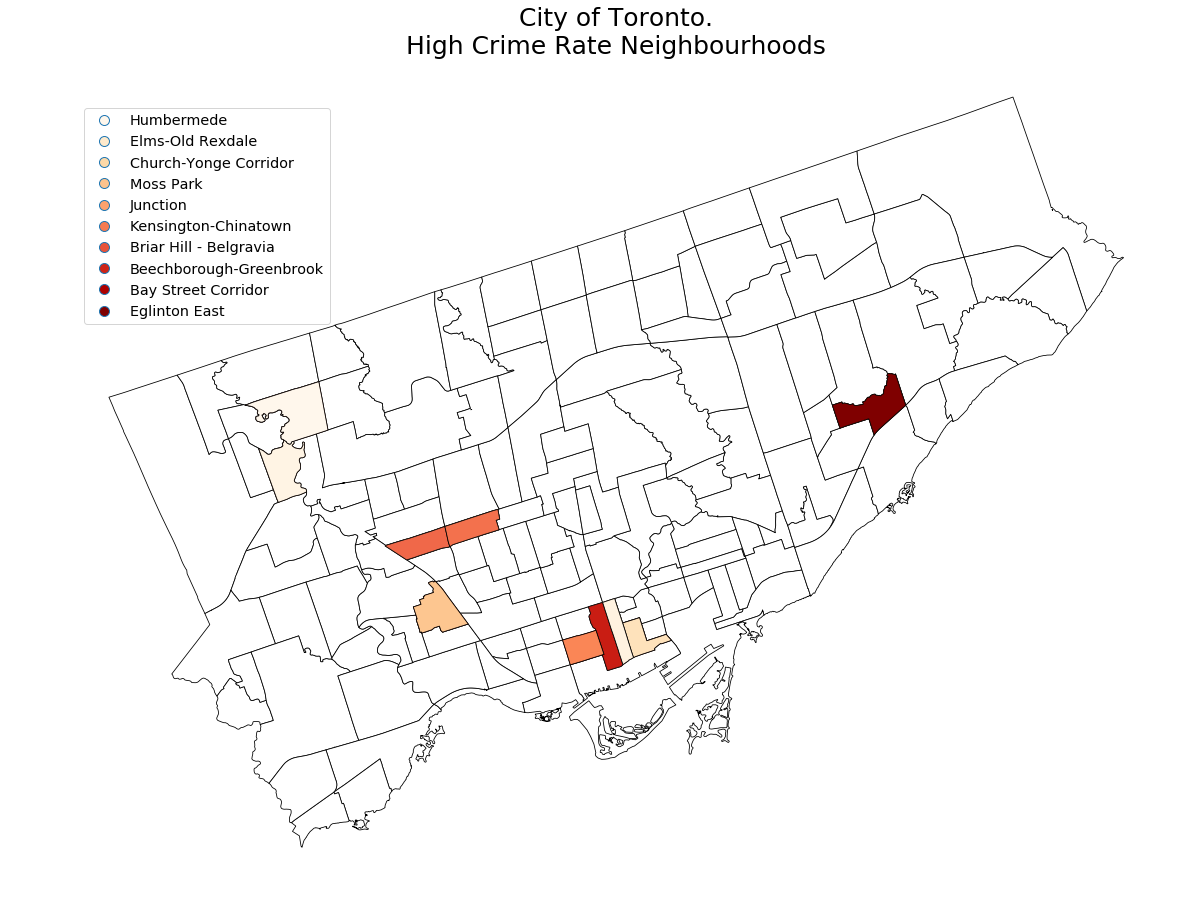

In [12]:
#this code plots the high crime rate neighbourhoods geometry and crime rates
plt.rc('legend',fontsize='x-large')
fig, ax = plt.subplots(1, figsize=(20, 20))
    
# set variables that will call the df columns to visualize on the map
variable = unsafe_hood_list['NAME']
variable2 = unsafe_hood_list['Total_Rate']

# set the range for the choropleth
vmin, vmax = 120, 220

# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, 
#but not when working with pyplot directly.
ax.set_aspect('equal')

#plot the city neighbourhoods map

plot1 = df1.plot(ax=ax, color = "white", linewidth=0.8, edgecolor='k')

#highlight high crime rate neighbourhoods

plot2 = unsafe_hood_list.plot(ax=ax, column = variable, cmap='OrRd', legend = True)

plot3 = unsafe_hood_list.plot(ax=ax, column = variable2, cmap='OrRd', linewidth=0.8, edgecolor = 'k')

# remove the axis
ax.set_axis_off()

# add a title
ax.set_title("City of Toronto.\nHigh Crime Rate Neighbourhoods", fontdict={'fontsize': '25', 'fontweight' : '3'});

#edit the legend text

new_labels=['Humbermede',
            'Elms-Old Rexdale',
            'Church-Yonge Corridor',
            'Moss Park',
            'Junction',
            'Kensington-Chinatown',
            'Briar Hill - Belgravia',
            'Beechborough-Greenbrook',
            'Bay Street Corridor',
            'Eglinton East']

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)
leg.set_bbox_to_anchor((0.25,0.95))

# show the map
plt.show();

# save the map
fig.savefig("map2_export.png", dpi=300)